In [45]:
'''
【项目15】  泰坦尼克号获救问题

数据来源：Kaggle数据集 → 共有1309名乘客数据，其中891是已知存活情况（train.csv），剩下418则是需要进行分析预测的（test.csv）
字段意义：
    PassengerId: 乘客编号
    Survived   :存活情况（存活：1 ; 死亡：0）
    Pclass      : 客舱等级
    Name       : 乘客姓名
    Sex          : 性别
    Age          : 年龄
    SibSp      : 同乘的兄弟姐妹/配偶数
    Parch      : 同乘的父母/小孩数
    Ticket      : 船票编号
    Fare        : 船票价格
    Cabin       :客舱号
    Embarked   : 登船港口
目的：通过已知获救数据，预测乘客生存情况

研究问题：
1、整体来看，存活比例如何？
要求：
① 读取已知生存数据train.csv
② 查看已知存活数据中，存活比例如何？

2、结合性别和年龄数据，分析幸存下来的人是哪些人？
要求：
① 年龄数据的分布情况
② 男性和女性存活情况
③ 老人和小孩存活情况

3、结合 SibSp、Parch字段，研究亲人多少与存活的关系
要求：
① 有无兄弟姐妹/父母子女和存活与否的关系
② 亲戚多少与存活与否的关系

4、结合票的费用情况，研究票价和存活与否的关系
要求：
① 票价分布和存活与否的关系
② 比较研究生还者和未生还者的票价情况

5、利用KNN分类模型，对结果进行预测
要求：
① 模型训练字段：'Survived','Pclass','Sex','Age','Fare','Family_Size'
② 模型预测test.csv样本数据的生还率
'''

"\n【项目15】  泰坦尼克号获救问题\n\n数据来源：Kaggle数据集 → 共有1309名乘客数据，其中891是已知存活情况（train.csv），剩下418则是需要进行分析预测的（test.csv）\n字段意义：\n    PassengerId: 乘客编号\n    Survived   :存活情况（存活：1 ; 死亡：0）\n    Pclass      : 客舱等级\n    Name       : 乘客姓名\n    Sex          : 性别\n    Age          : 年龄\n    SibSp      : 同乘的兄弟姐妹/配偶数\n    Parch      : 同乘的父母/小孩数\n    Ticket      : 船票编号\n    Fare        : 船票价格\n    Cabin       :客舱号\n    Embarked   : 登船港口\n目的：通过已知获救数据，预测乘客生存情况\n\n研究问题：\n1、整体来看，存活比例如何？\n要求：\n① 读取已知生存数据train.csv\n② 查看已知存活数据中，存活比例如何？\n\n2、结合性别和年龄数据，分析幸存下来的人是哪些人？\n要求：\n① 年龄数据的分布情况\n② 男性和女性存活情况\n③ 老人和小孩存活情况\n\n3、结合 SibSp、Parch字段，研究亲人多少与存活的关系\n要求：\n① 有无兄弟姐妹/父母子女和存活与否的关系\n② 亲戚多少与存活与否的关系\n\n4、结合票的费用情况，研究票价和存活与否的关系\n要求：\n① 票价分布和存活与否的关系\n② 比较研究生还者和未生还者的票价情况\n\n5、利用KNN分类模型，对结果进行预测\n要求：\n① 模型训练字段：'Survived','Pclass','Sex','Age','Fare','Family_Size'\n② 模型预测test.csv样本数据的生还率\n"

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
# 1、整体来看，存活比例如何？
# ① 读取已知生存数据train.csv

train = pd.read_csv('train.csv')

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.shape

(891, 12)

In [50]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


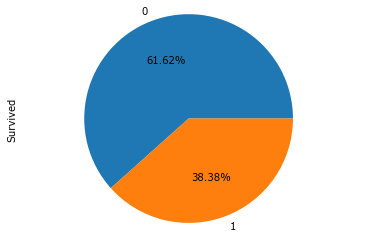

In [52]:
# ② 查看已知存活数据中，存活比例如何？

plt.axis('equal')
train.Survived.value_counts().plot(kind='pie', autopct='%.2f%%', radius=1.2)

In [53]:
# 2、结合性别和年龄数据，分析幸存下来的人是哪些人？
# ① 年龄数据的分布情况
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> 说明：Age字段有177个缺失值，平均年龄在30岁左右，幅度在15左右变化，且有婴儿和老人存在（一般婴儿，老人都是照顾对象，这个字段抽取特征会影响后面是否生存）...

Text(0,0.5,'Numbers')

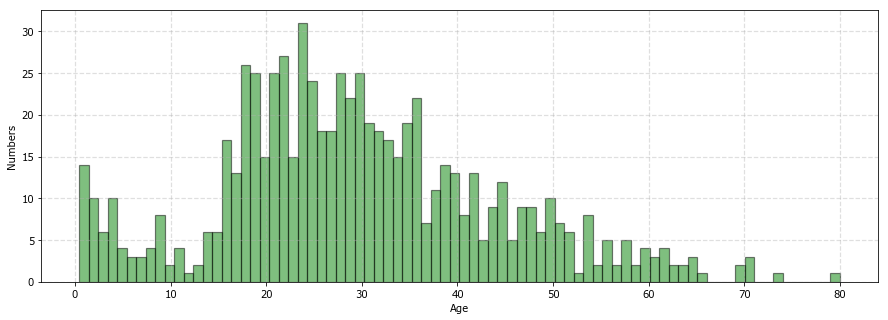

In [54]:
train.Age.hist(bins=80,
      histtype='bar',
      orientation='vertical',
      alpha=0.5,
      color='g',
      figsize=[15, 5],
      edgecolor='black', linewidth=1.2)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Numbers')

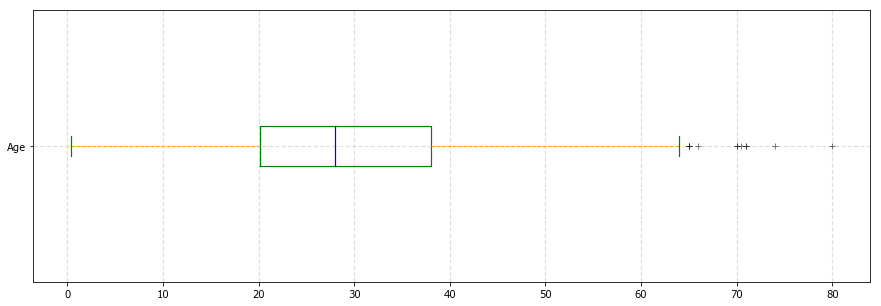

In [55]:
f = train.boxplot(column=['Age'],
            vert=False,
            meanline=False,
            showbox=True,
            figsize=[15, 5],
            return_type='dict')

for box in f['boxes']:
    box.set(color='green', linewidth=1.2)
for whisker in f['whiskers']:
    whisker.set(color='orange', linewidth=1, linestyle='dashed')
for cap in f['caps']:
    cap.set(color='green', linewidth=1.2)
for median in f['medians']:
    median.set(color='blue', linewidth=1.2)
for flier in f['fliers']:
    flier.set(marker='+', color='black', alpha=0.5)
    
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)

In [56]:
# ② 男性和女性存活情况
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

> 说明：很明显，女性存活率要远大于男性，Lady and Kid First！

In [57]:
SurvivedListBySex = train.groupby(['Sex', 'Survived'])['Survived'].count().values
FemaleSurvivedRateBySex = SurvivedListBySex[1] / (SurvivedListBySex[0] + SurvivedListBySex[1])
MaleSurvivedRateBySex = SurvivedListBySex[3] / (SurvivedListBySex[2] + SurvivedListBySex[3])
print('女性存活率为{:.2%}'.format(FemaleSurvivedRateBySex))
print('男性存活率为{:.2%}'.format(MaleSurvivedRateBySex))

女性存活率为74.20%
男性存活率为18.89%


Text(0.5,0,'SurvivedRate')

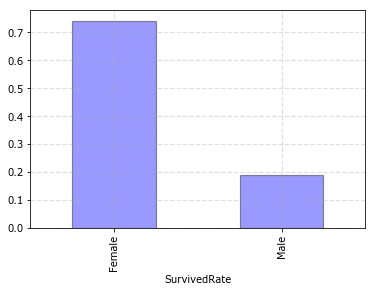

In [58]:
SurvivedRate = pd.DataFrame({'Female': [FemaleSurvivedRateBySex], 'Male': [MaleSurvivedRateBySex]})
SurvivedRate.T.plot(kind='bar', color='blue', legend=False, alpha=0.4, edgecolor='black', linewidth=1.2)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xlabel('Sex')
plt.xlabel('SurvivedRate')

In [59]:
train.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [60]:
SurvivedListByPclass = train.groupby(['Pclass'])['Survived'].value_counts().values
SurvivedRateByPclass1 = SurvivedListByPclass[0] / (SurvivedListByPclass[0] + SurvivedListByPclass[1])
SurvivedRateByPclass2 = SurvivedListByPclass[3] / (SurvivedListByPclass[2] + SurvivedListByPclass[3])
SurvivedRateByPclass3 = SurvivedListByPclass[5] / (SurvivedListByPclass[4] + SurvivedListByPclass[5])
print('Pclass1存活率为{:.2%}'.format(SurvivedRateByPclass1))
print('Pclass2存活率为{:.2%}'.format(SurvivedRateByPclass2))
print('Pclass3存活率为{:.2%}'.format(SurvivedRateByPclass3))

Pclass1存活率为62.96%
Pclass2存活率为47.28%
Pclass3存活率为24.24%


> 说明：乘客等级越高，存活率也就越高...

Text(0.5,1,'SurvivedByPclass')

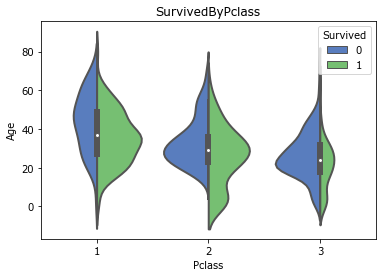

In [61]:
sns.violinplot(x="Pclass", y="Age", data=train,
            linewidth=2,
            width=0.8,
            palette="muted",
            scale='count',
            gridsize=50,
            inner='box',
            split=True,
            hue='Survived')
plt.title('SurvivedByPclass')

> 说明：上图中也很明显可以看出，随着乘客等级的降低，存活的人数也在减少，且Pclass1的存活的人员的年龄都集中在30~60，也就是说这部分年龄正好是财富拥有比较多的时候，Pclass2/3的乘客的年龄则相对年轻，大多在20~40区间，间接说明，财富间接影响了存活率的情况...，不过在这里会有部分小孩存活了下来，即使在2/3等舱，老人和小孩，还有妇女都是优先被照顾的对象...

Text(0.5,1,'SurvivedBySex')

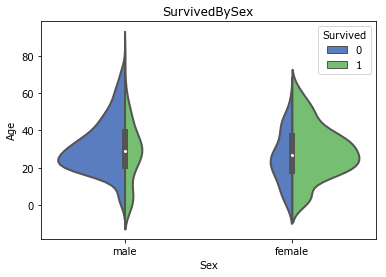

In [62]:
sns.violinplot(x="Sex", y="Age", data=train,
            linewidth=2,
            width=0.8,
            palette="muted",
            scale='count',
            gridsize=50,
            inner='box',
            split=True,
            hue='Survived')
plt.title('SurvivedBySex')

> 说明：上图还是说明了女性存货人数明显大于男性，且年份分布较广，集中在10~40区间，这部分应该是适宜生育阶段吧... YY一下~~

In [63]:
# ③ 老人和小孩存活情况
train.loc[(train.Age < 1.0), 'Age'] = 0
train.loc[(train.Age == 14.5), 'Age'] = 14
train.loc[(train.Age == 20.5), 'Age'] = 20
train.loc[(train.Age == 23.5), 'Age'] = 23
train.loc[(train.Age == 24.5), 'Age'] = 24
train.loc[(train.Age == 28.5), 'Age'] = 28
train.loc[(train.Age == 30.5), 'Age'] = 30
train.loc[(train.Age == 32.5), 'Age'] = 32
train.loc[(train.Age == 34.5), 'Age'] = 34
train.loc[(train.Age == 36.5), 'Age'] = 36
train.loc[(train.Age == 40.5), 'Age'] = 40
train.loc[(train.Age == 45.5), 'Age'] = 45
train.loc[(train.Age == 55.5), 'Age'] = 55
train.loc[(train.Age == 70.5), 'Age'] = 70
SurvivedByAge = pd.DataFrame(train.groupby(['Age'])['Survived'].value_counts())
SurvivedByAge.columns = ['Numbers']
SurvivedByAge.reset_index(inplace=True)
Survived0ListByAge = []
Survived1ListByAge = []
for age in SurvivedByAge.Age.unique():        
    Survived0ListByAge.append(SurvivedByAge.loc[(SurvivedByAge.Age == age) & (SurvivedByAge.Survived == 0), 'Numbers'].values)
    Survived1ListByAge.append(SurvivedByAge.loc[(SurvivedByAge.Age == age) & (SurvivedByAge.Survived == 1), 'Numbers'].values)

In [64]:
SurvivedRateByAge = pd.DataFrame({'Age': SurvivedByAge.Age.unique(), 'NumbersOfNoSurvived': Survived0ListByAge,
                                  'NumbersOfSurvived': Survived1ListByAge}, columns=['Age', 'NumbersOfNoSurvived', 'NumbersOfSurvived'])

for i in SurvivedRateByAge.index:
    if not SurvivedRateByAge.loc[i, 'NumbersOfNoSurvived']:
        SurvivedRateByAge.loc[i, 'NumbersOfNoSurvived'] = 0
    else:
        SurvivedRateByAge.loc[i, 'NumbersOfNoSurvived'] = SurvivedRateByAge.loc[i, 'NumbersOfNoSurvived'][0]
    if not SurvivedRateByAge.loc[i, 'NumbersOfSurvived']:
        SurvivedRateByAge.loc[i, 'NumbersOfSurvived'] = 0
    else:
        SurvivedRateByAge.loc[i, 'NumbersOfSurvived'] = SurvivedRateByAge.loc[i, 'NumbersOfSurvived'][0]

SurvivedRateByAge['SurvivedRate'] = SurvivedRateByAge['NumbersOfSurvived'] / (SurvivedRateByAge['NumbersOfSurvived'] + SurvivedRateByAge['NumbersOfNoSurvived'])

Text(0.5,1,'SurvivedRateByAge')

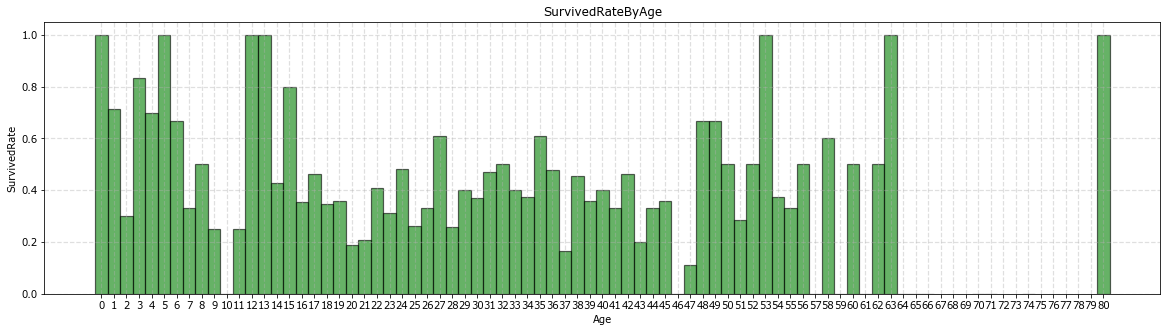

In [65]:
plt.figure(figsize=[20, 5])
plt.bar(x=SurvivedRateByAge.Age, height=SurvivedRateByAge.SurvivedRate, color='green', alpha=0.6, edgecolor='black', 
        linewidth=1.2, width=1.0)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xticks(np.arange(0, 81))
plt.xlabel('Age')
plt.ylabel('SurvivedRate')
plt.title('SurvivedRateByAge')

> 说明：我们可以看到老人和小孩还是挺受照顾的，基本上存活率都不错，我们看从0~15岁，存活率都挺高的，还有老人从50~80，也不错...

In [66]:
# 3、结合 SibSp、Parch字段，研究亲人多少与存活的关系
# ① 有无兄弟姐妹/父母子女和存活与否的关系

SurvivedBySibSp = pd.DataFrame(train.groupby(['SibSp'])['Survived'].value_counts())
SurvivedBySibSp.columns = ['Numbers']
SurvivedBySibSp.reset_index(inplace=True)
Survived0ListBySibSp = []
Survived1ListBySibSp = []
for SibSp in SurvivedBySibSp.SibSp.unique():        
    Survived0ListBySibSp.append(SurvivedBySibSp.loc[(SurvivedBySibSp.SibSp == SibSp) & (SurvivedBySibSp.Survived == 0), 'Numbers'].values)
    Survived1ListBySibSp.append(SurvivedBySibSp.loc[(SurvivedBySibSp.SibSp == SibSp) & (SurvivedBySibSp.Survived == 1), 'Numbers'].values)

SurvivedRateBySibSp = pd.DataFrame({'SibSp': SurvivedBySibSp.SibSp.unique(), 'NumbersOfNoSurvived': Survived0ListBySibSp,
                                  'NumbersOfSurvived': Survived1ListBySibSp}, columns=['SibSp', 'NumbersOfNoSurvived', 'NumbersOfSurvived'])

for i in SurvivedRateBySibSp.index:
    if not SurvivedRateBySibSp.loc[i, 'NumbersOfNoSurvived']:
        SurvivedRateBySibSp.loc[i, 'NumbersOfNoSurvived'] = 0
    else:
        SurvivedRateBySibSp.loc[i, 'NumbersOfNoSurvived'] = SurvivedRateBySibSp.loc[i, 'NumbersOfNoSurvived'][0]
    if not SurvivedRateBySibSp.loc[i, 'NumbersOfSurvived']:
        SurvivedRateBySibSp.loc[i, 'NumbersOfSurvived'] = 0
    else:
        SurvivedRateBySibSp.loc[i, 'NumbersOfSurvived'] = SurvivedRateBySibSp.loc[i, 'NumbersOfSurvived'][0]
SurvivedRateBySibSp['SurvivedRate'] = SurvivedRateBySibSp['NumbersOfSurvived'] / (SurvivedRateBySibSp['NumbersOfSurvived'] + SurvivedRateBySibSp['NumbersOfNoSurvived'])
SurvivedRateBySibSp['NotSurvivedRate'] = SurvivedRateBySibSp['NumbersOfNoSurvived'] / (SurvivedRateBySibSp['NumbersOfSurvived'] + SurvivedRateBySibSp['NumbersOfNoSurvived'])

In [67]:
NumbersOfHasSibSp = SurvivedRateBySibSp[SurvivedRateBySibSp.SibSp != 0].sum()
NumbersOfNoSibSp = SurvivedRateBySibSp[SurvivedRateBySibSp.SibSp == 0].sum()

NumbersOfSibSp = pd.DataFrame({'HasSibSp': NumbersOfHasSibSp.values[1:3],
                              'NoSibSp': NumbersOfNoSibSp.values[1:3]},
    index=['No Survived', 'Survived'])

In [68]:
SurvivedByParch = pd.DataFrame(train.groupby(['Parch'])['Survived'].value_counts())
SurvivedByParch.columns = ['Numbers']
SurvivedByParch.reset_index(inplace=True)
Survived0ListByParch = []
Survived1ListByParch = []
for Parch in SurvivedByParch.Parch.unique():        
    Survived0ListByParch.append(SurvivedByParch.loc[(SurvivedByParch.Parch == Parch) & (SurvivedByParch.Survived == 0), 'Numbers'].values)
    Survived1ListByParch.append(SurvivedByParch.loc[(SurvivedByParch.Parch == Parch) & (SurvivedByParch.Survived == 1), 'Numbers'].values)

SurvivedRateByParch = pd.DataFrame({'Parch': SurvivedByParch.Parch.unique(), 'NumbersOfNoSurvived': Survived0ListByParch,
                                  'NumbersOfSurvived': Survived1ListByParch}, columns=['Parch', 'NumbersOfNoSurvived', 'NumbersOfSurvived'])

for i in SurvivedRateByParch.index:
    if not SurvivedRateByParch.loc[i, 'NumbersOfNoSurvived']:
        SurvivedRateByParch.loc[i, 'NumbersOfNoSurvived'] = 0
    else:
        SurvivedRateByParch.loc[i, 'NumbersOfNoSurvived'] = SurvivedRateByParch.loc[i, 'NumbersOfNoSurvived'][0]
    if not SurvivedRateByParch.loc[i, 'NumbersOfSurvived']:
        SurvivedRateByParch.loc[i, 'NumbersOfSurvived'] = 0
    else:
        SurvivedRateByParch.loc[i, 'NumbersOfSurvived'] = SurvivedRateByParch.loc[i, 'NumbersOfSurvived'][0]
SurvivedRateByParch['SurvivedRate'] = SurvivedRateByParch['NumbersOfSurvived'] / (SurvivedRateByParch['NumbersOfSurvived'] + SurvivedRateByParch['NumbersOfNoSurvived'])
SurvivedRateByParch['NotSurvivedRate'] = SurvivedRateByParch['NumbersOfNoSurvived'] / (SurvivedRateByParch['NumbersOfSurvived'] + SurvivedRateByParch['NumbersOfNoSurvived'])

In [69]:
NumbersOfHasParch = SurvivedRateByParch[SurvivedRateByParch.Parch != 0].sum()
NumbersOfNoParch = SurvivedRateByParch[SurvivedRateByParch.Parch == 0].sum()

NumbersOfParch = pd.DataFrame({'HasParch': NumbersOfHasParch.values[1:3],
                              'NoParch': NumbersOfNoParch.values[1:3]},
    index=['No Survived', 'Survived'])

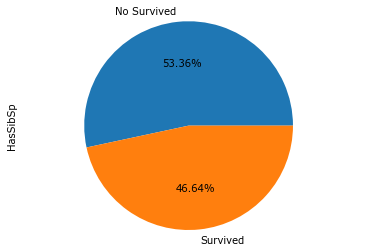

In [70]:
plt.axis('equal')
NumbersOfSibSp.HasSibSp.plot(kind='pie', autopct='%.2f%%', radius=1.2)

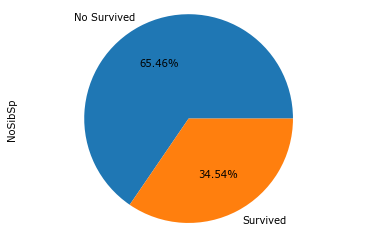

In [71]:
plt.axis('equal')
NumbersOfSibSp.NoSibSp.plot(kind='pie', autopct='%.2f%%', radius=1.2)

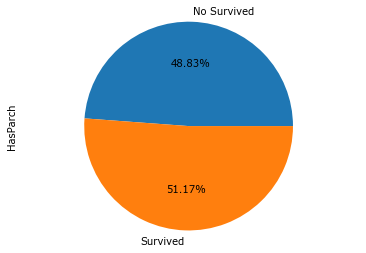

In [72]:
plt.axis('equal')
NumbersOfParch.HasParch.plot(kind='pie', autopct='%.2f%%', radius=1.2)

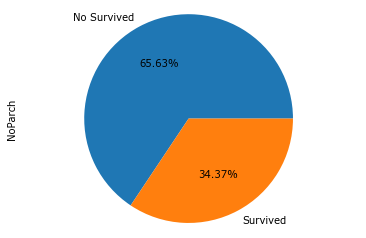

In [73]:
plt.axis('equal')
NumbersOfParch.NoParch.plot(kind='pie', autopct='%.2f%%', radius=1.2)

In [74]:
SurvivedRateBySibSp

,SibSp,NumbersOfNoSurvived,NumbersOfSurvived,SurvivedRate,NotSurvivedRate
0,0,398,210,0.345395,0.654605
1,1,97,112,0.535885,0.464115
2,2,15,13,0.464286,0.535714
3,3,12,4,0.250000,0.750000
4,4,15,3,0.166667,0.833333
5,5,5,0,0.000000,1.000000
6,8,7,0,0.000000,1.000000


In [75]:
SurvivedRateByParch

,Parch,NumbersOfNoSurvived,NumbersOfSurvived,SurvivedRate,NotSurvivedRate
0,0,445,233,0.343658,0.656342
1,1,53,65,0.550847,0.449153
2,2,40,40,0.500000,0.500000
3,3,2,3,0.600000,0.400000
4,4,4,0,0.000000,1.000000
5,5,4,1,0.200000,0.800000
6,6,1,0,0.000000,1.000000


Text(0.5,1,'SurvivedRateBySibSp')

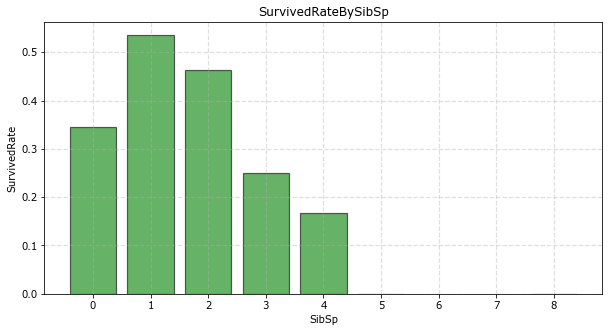

In [76]:
plt.figure(figsize=[10, 5])
plt.bar(x=SurvivedRateBySibSp.SibSp, height=SurvivedRateBySibSp.SurvivedRate, color='green', alpha=0.6, edgecolor='black', 
        linewidth=1.2, width=0.8)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xticks(np.arange(0, 9))
plt.xlabel('SibSp')
plt.ylabel('SurvivedRate')
plt.title('SurvivedRateBySibSp')

Text(0.5,1,'SurvivedRateByParch')

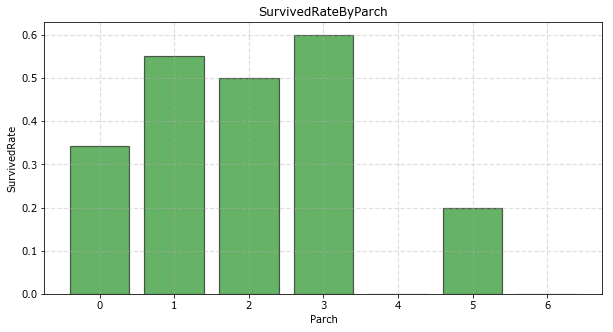

In [77]:
plt.figure(figsize=[10, 5])
plt.bar(x=SurvivedRateByParch.Parch, height=SurvivedRateByParch.SurvivedRate, color='green', alpha=0.6, edgecolor='black', 
        linewidth=1.2, width=0.8)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xticks(np.arange(0, 7))
plt.xlabel('Parch')
plt.ylabel('SurvivedRate')
plt.title('SurvivedRateByParch')

> 说明：从图中我们可以看到，有无父母\孩子\兄弟姐妹，还是对是否存活是有影响的，一般来说，独身的人，可能希望存活下去的意愿更小... 另外，如果兄弟姐妹人数过多的，存活率也会较小，因为会选择性的存活下去...（哎，感觉有点悲哀...）

In [78]:
train['FamilySize'] = train.SibSp + train.Parch + 1
SurvivedByFamilySize= pd.DataFrame(train.groupby(['FamilySize'])['Survived'].value_counts())
SurvivedByFamilySize.columns = ['Numbers']
SurvivedByFamilySize.reset_index(inplace=True)
Survived0ListByFamilySize = []
Survived1ListByFamilySize = []
for FamilySize in SurvivedByFamilySize.FamilySize.unique():        
    Survived0ListByFamilySize.append(SurvivedByFamilySize.loc[(SurvivedByFamilySize.FamilySize == FamilySize) & (SurvivedByFamilySize.Survived == 0), 'Numbers'].values)
    Survived1ListByFamilySize.append(SurvivedByFamilySize.loc[(SurvivedByFamilySize.FamilySize == FamilySize) & (SurvivedByFamilySize.Survived == 1), 'Numbers'].values)

SurvivedRateByFamilySize = pd.DataFrame({'FamilySize': SurvivedByFamilySize.FamilySize.unique(), 'NumbersOfNoSurvived': Survived0ListByFamilySize,
                                  'NumbersOfSurvived': Survived1ListByFamilySize}, columns=['FamilySize', 'NumbersOfNoSurvived', 'NumbersOfSurvived'])

for i in SurvivedRateByFamilySize.index:
    if not SurvivedRateByFamilySize.loc[i, 'NumbersOfNoSurvived']:
        SurvivedRateByFamilySize.loc[i, 'NumbersOfNoSurvived'] = 0
    else:
        SurvivedRateByFamilySize.loc[i, 'NumbersOfNoSurvived'] = SurvivedRateByFamilySize.loc[i, 'NumbersOfNoSurvived'][0]
    if not SurvivedRateByFamilySize.loc[i, 'NumbersOfSurvived']:
        SurvivedRateByFamilySize.loc[i, 'NumbersOfSurvived'] = 0
    else:
        SurvivedRateByFamilySize.loc[i, 'NumbersOfSurvived'] = SurvivedRateByFamilySize.loc[i, 'NumbersOfSurvived'][0]
SurvivedRateByFamilySize['SurvivedRate'] = SurvivedRateByFamilySize['NumbersOfSurvived'] / (SurvivedRateByFamilySize['NumbersOfSurvived'] + SurvivedRateByFamilySize['NumbersOfNoSurvived'])
SurvivedRateByFamilySize['NotSurvivedRate'] = SurvivedRateByFamilySize['NumbersOfNoSurvived'] / (SurvivedRateByFamilySize['NumbersOfSurvived'] + SurvivedRateByFamilySize['NumbersOfNoSurvived'])

In [79]:
SurvivedRateByFamilySize

,FamilySize,NumbersOfNoSurvived,NumbersOfSurvived,SurvivedRate,NotSurvivedRate
0,1,374,163,0.303538,0.696462
1,2,72,89,0.552795,0.447205
2,3,43,59,0.578431,0.421569
3,4,8,21,0.724138,0.275862
4,5,12,3,0.200000,0.800000
5,6,19,3,0.136364,0.863636
6,7,8,4,0.333333,0.666667
7,8,6,0,0.000000,1.000000
8,11,7,0,0.000000,1.000000


Text(0.5,1,'SurvivedRateByFamilySize')

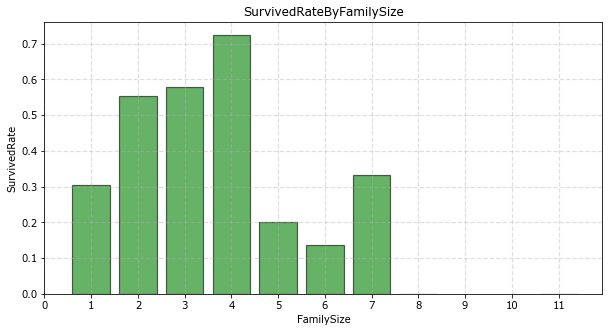

In [80]:
plt.figure(figsize=[10, 5])
plt.bar(x=SurvivedRateByFamilySize.FamilySize, height=SurvivedRateByFamilySize.SurvivedRate, color='green', alpha=0.6, edgecolor='black', 
        linewidth=1.2, width=0.8)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xticks(np.arange(0, 12))
plt.xlabel('FamilySize')
plt.ylabel('SurvivedRate')
plt.title('SurvivedRateByFamilySize')

> 说明：大家族选择存活的人几乎没有，而4个人的家族，存活率最大，这个阶段基本上是一个三口之家，四口之家之类，都有很大的压力的...

Text(0,0.5,'Numbers')

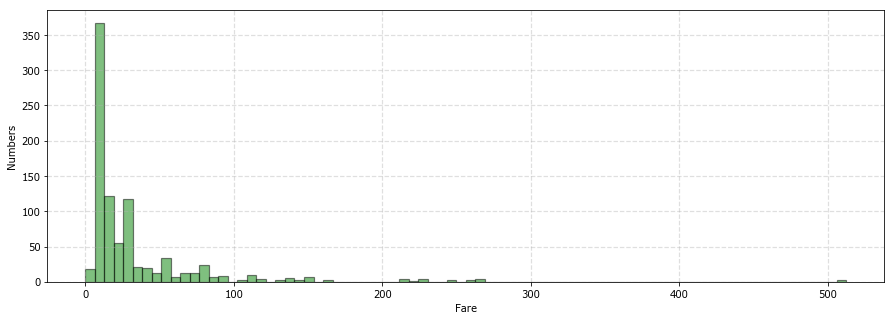

In [81]:
# 4、结合票的费用情况，研究票价和存活与否的关系
# ① 票价分布和存活与否的关系

train.Fare.hist(bins=80,
      histtype='bar',
      orientation='vertical',
      alpha=0.5,
      color='g',
      figsize=[15, 5],
      edgecolor='black', linewidth=1.2)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)
plt.xlabel('Fare')
plt.ylabel('Numbers')

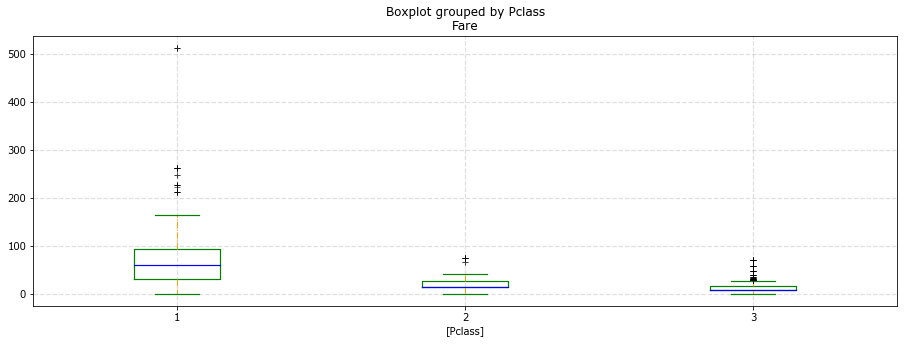

In [82]:
f = train.boxplot(column=['Fare'], by=['Pclass'],
            meanline=False,
            whis=1.5,
            showmeans=False,             
            showbox=True,
            figsize=[15, 5],
            return_type='dict')

for i in range(1):
    for box in f[i]['boxes']:
        box.set(color='green', linewidth=1.2)
    for whisker in f[i]['whiskers']:
        whisker.set(color='orange', linewidth=1, linestyle='-.')
    for cap in f[i]['caps']:
        cap.set(color='green', linewidth=1.2)
    for median in f[i]['medians']:
        median.set(color='blue', linewidth=1.2)
    for flier in f[i]['fliers']:
        flier.set(marker='+', color='black', alpha=0.5)
        
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)

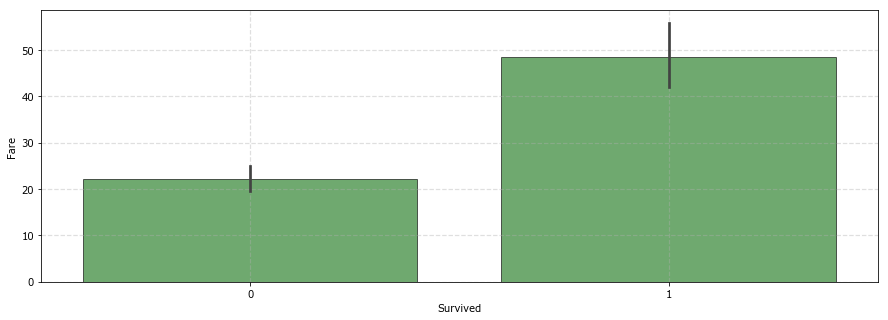

In [83]:
plt.figure(figsize=[15, 5])
sns.barplot(x="Survived", y="Fare", data=train,
            color='green', edgecolor='black', alpha=0.6)
plt.grid(linestyle='dashed', alpha=0.4, linewidth=1.2)

> 说明：这里生还的人的平均票价要高于没有存活的...

In [84]:
# 5、利用KNN分类模型，对结果进行预测
# ① 模型训练字段：'Survived','Pclass','Sex','Age','Fare','Family_Size'

from sklearn.neighbors import KNeighborsClassifier

train.Age.fillna(train.Age.mean(), inplace=True)

dummiesSex= pd.get_dummies(train['Sex'], prefix='Sex')
trainFilter = pd.concat([train[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']], dummiesSex], axis=1)

knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(trainFilter[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'Fare', 'FamilySize']], trainFilter.Survived)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='uniform')

In [85]:
test = pd.read_csv('test.csv')
dummiesAgetest = pd.get_dummies(test['Sex'], prefix='Sex')
test.Age.fillna(test.Age.mean(), inplace=True)
test.Fare.fillna(test.Fare.mean(), inplace=True)
test['FamilySize'] = test.SibSp + test.Parch + 1
testFilter = pd.concat([test[['Pclass', 'Age', 'Fare', 'FamilySize']], dummiesAgetest], axis=1)

In [86]:
test['Survived'] = knn.predict(testFilter[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'Fare', 'FamilySize']])

In [87]:
print('预测模型得到的生还率：{:.2%}'.format(test['Survived'].value_counts()[1] / len(test)))

预测模型得到的生还率：20.57%


In [88]:
from sklearn.model_selection import cross_val_score, train_test_split

split_Xtrain, split_Xval, split_ytrain, split_yval = train_test_split(trainFilter[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'Fare', 'FamilySize']], trainFilter.Survived)

knn.fit(split_Xtrain, split_ytrain)
print('模型准确率：{:.2%}'.format(knn.score(split_Xval, split_yval)))

模型准确率：73.99%
